In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Module 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Benefits.csv")

In [ ]:
df.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4877 non-null   int64  
 1   stateur   4877 non-null   float64
 2   statemb   4877 non-null   int64  
 3   state     4877 non-null   int64  
 4   age       4877 non-null   int64  
 5   tenure    4877 non-null   int64  
 6   joblost   4877 non-null   object 
 7   nwhite    4877 non-null   object 
 8   school12  4877 non-null   object 
 9   sex       4877 non-null   object 
 10  bluecol   4877 non-null   object 
 11  smsa      4877 non-null   object 
 12  married   4877 non-null   object 
 13  dkids     4877 non-null   object 
 14  dykids    4877 non-null   object 
 15  yrdispl   4877 non-null   int64  
 16  rr        4877 non-null   float64
 17  head      4877 non-null   object 
 18  ui        4877 non-null   object 
dtypes: float64(2), int64(6), object(11)
memory usage: 724.1+ KB
None
    

In [4]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])

print("Numerical Columns:", numerical_data.columns.tolist())
print("Categorical Columns:", categorical_data.columns.tolist())

Numerical Columns: ['rownames', 'stateur', 'statemb', 'state', 'age', 'tenure', 'yrdispl', 'rr']
Categorical Columns: ['joblost', 'nwhite', 'school12', 'sex', 'bluecol', 'smsa', 'married', 'dkids', 'dykids', 'head', 'ui']


In [5]:
print(df.isnull().sum())

df.fillna({'age': df['age'].mean()}, inplace=True)
df.dropna(subset=['stateur'], inplace=True)

rownames    0
stateur     0
statemb     0
state       0
age         0
tenure      0
joblost     0
nwhite      0
school12    0
sex         0
bluecol     0
smsa        0
married     0
dkids       0
dykids      0
yrdispl     0
rr          0
head        0
ui          0
dtype: int64


In [6]:
df.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


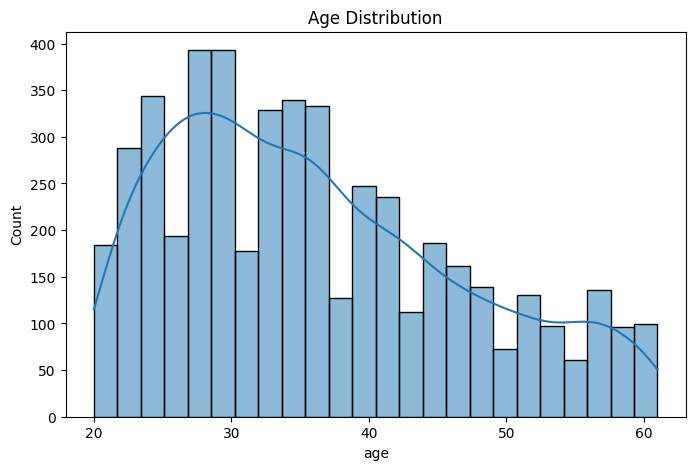

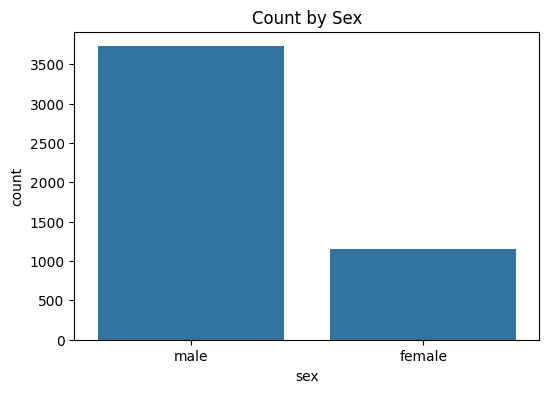

In [7]:
# Software tools

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Count by Sex')
plt.show()

## Module 2

In [8]:
# Check for duplicates in the dataset
print("Number of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows if any
data_dedup = df.drop_duplicates()
print("Number of rows after deduplication:", len(data_dedup))

Number of duplicate rows: 0
Number of rows after deduplication: 4877


In [9]:
# Replace 'Sex' with numerical values
data_dedup['sex'] = data_dedup['sex'].replace({'male': 1, 'female': 0})
print(data_dedup[['sex']].head())

   sex
0    1
1    1
2    0
3    0
4    1


<ipython-input-9-cb0e359a62c7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_dedup['sex'] = data_dedup['sex'].replace({'male': 1, 'female': 0})


In [10]:
# Create more detailed age bins
bins = [0, 5, 12, 18, 25, 35, 45, 60, 80, 100]
labels = ['Infant', 'Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior Adult', 'Senior', 'Elder']
data_dedup['AgeGroup'] = pd.cut(data_dedup['age'], bins=bins, labels=labels)

# Display the distribution of age groups
print(data_dedup['AgeGroup'].value_counts())

AgeGroup
Adult           1826
Middle Aged     1241
Senior Adult     952
Young Adult      816
Senior            42
Infant             0
Child              0
Teen               0
Elder              0
Name: count, dtype: int64


In [11]:
print(data_dedup.isnull().sum())
data_no_na = data_dedup.dropna()
data_dedup.fillna({'age':data_dedup['age'].mean()}, inplace = True)

rownames    0
stateur     0
statemb     0
state       0
age         0
tenure      0
joblost     0
nwhite      0
school12    0
sex         0
bluecol     0
smsa        0
married     0
dkids       0
dykids      0
yrdispl     0
rr          0
head        0
ui          0
AgeGroup    0
dtype: int64


In [12]:
from scipy.stats import norm

age_data = data_dedup['age'].dropna()
mean, std_dev = norm.fit(age_data)
data_dedup.fillna({'age':mean}, inplace = True)
print("Filled missing values in 'Age' with MLE estimated mean:", mean)

Filled missing values in 'Age' with MLE estimated mean: 36.129997949559154


## Module 3

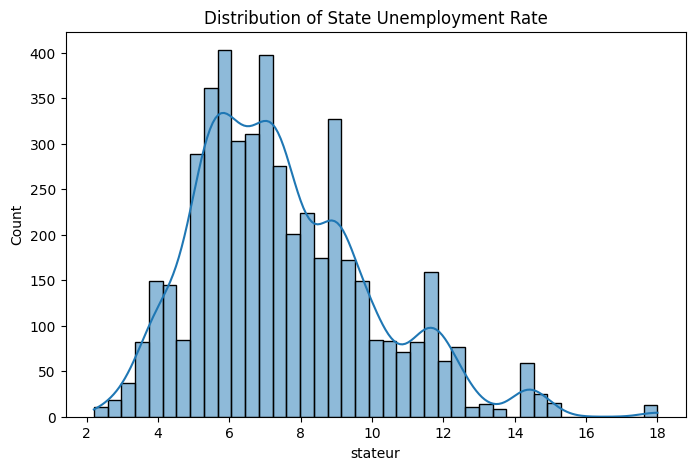

In [13]:
# Univariate analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['stateur'], kde=True)
plt.title('Distribution of State Unemployment Rate')
plt.show()

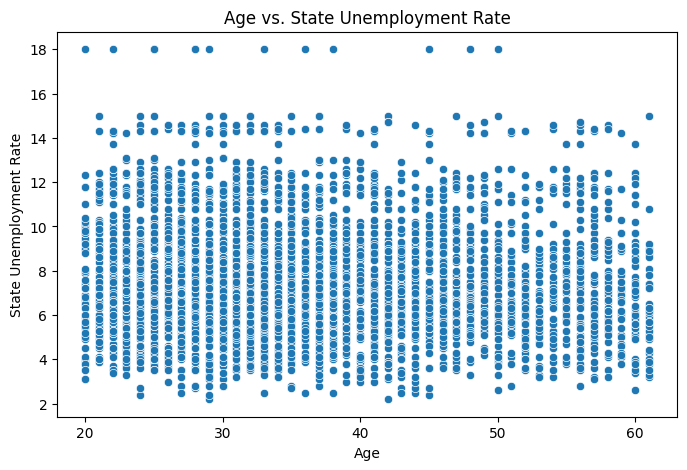

In [14]:
# Bivariate analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='stateur', data=df)
plt.title('Age vs. State Unemployment Rate')
plt.xlabel('Age')
plt.ylabel('State Unemployment Rate')
plt.show()

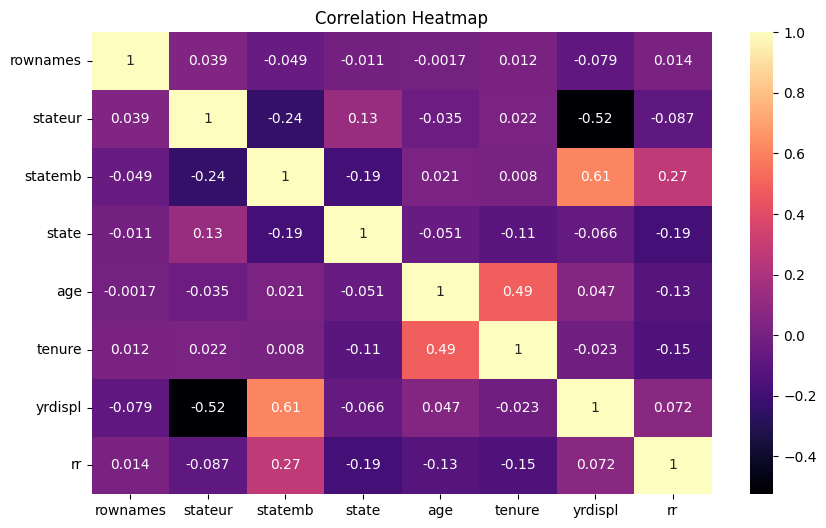

In [15]:
# Multivariate analysis
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

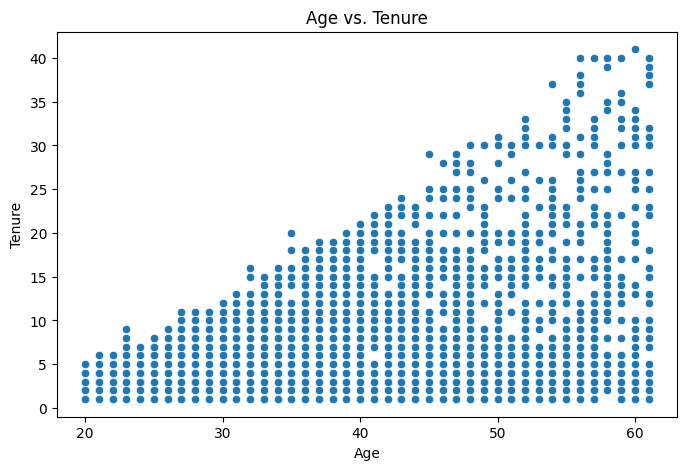

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='tenure', data=df)
plt.title('Age vs. Tenure')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.show()

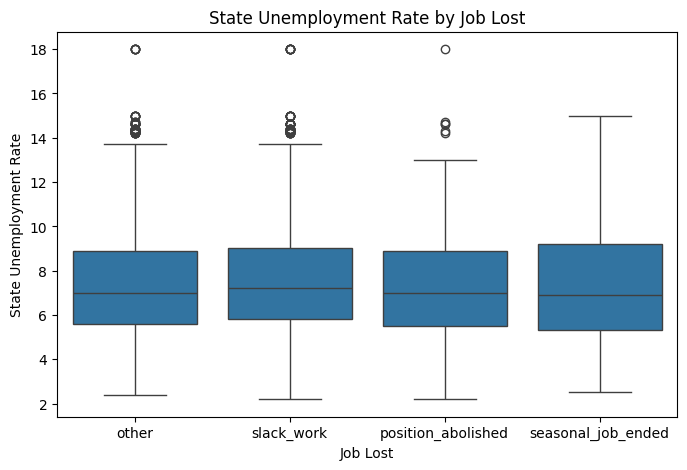

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='joblost', y='stateur', data=df)
plt.title('State Unemployment Rate by Job Lost')
plt.xlabel('Job Lost')
plt.ylabel('State Unemployment Rate')
plt.show()

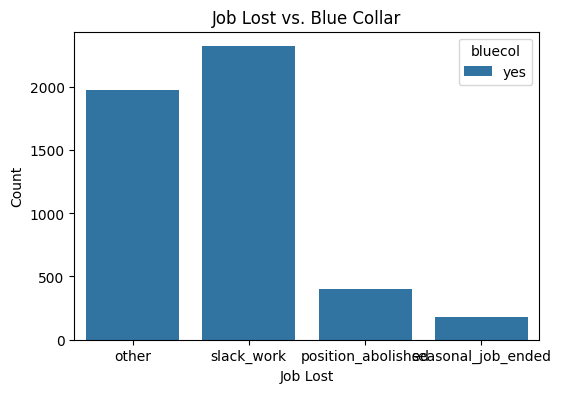

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='joblost', hue='bluecol', data=df)
plt.title('Job Lost vs. Blue Collar')
plt.xlabel('Job Lost')
plt.ylabel('Count')
plt.show()

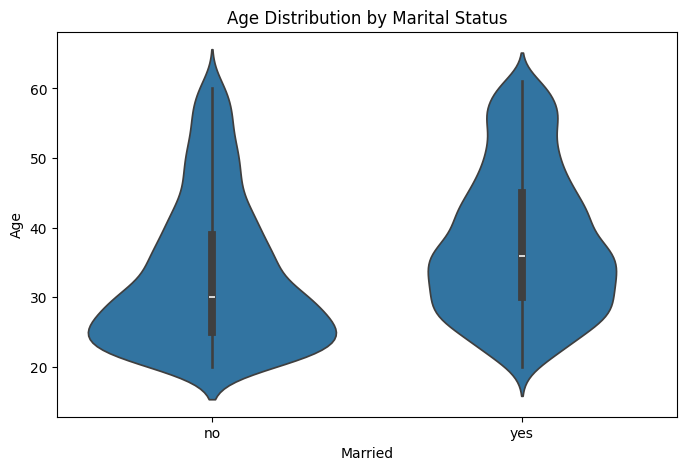

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='married', y='age', data=df)
plt.title('Age Distribution by Marital Status')
plt.xlabel('Married')
plt.ylabel('Age')
plt.show()

## Module 4

In [20]:
summary = df.describe()
print(summary)

          rownames      stateur      statemb        state          age  \
count  4877.000000  4877.000000  4877.000000  4877.000000  4877.000000   
mean   2439.000000     7.511031   180.660242    52.808079    36.129998   
std    1408.012962     2.500579    43.241595    25.834967    10.600737   
min       1.000000     2.200000    84.000000    11.000000    20.000000   
25%    1220.000000     5.700000   150.000000    31.000000    28.000000   
50%    2439.000000     7.200000   177.000000    55.000000    34.000000   
75%    3658.000000     9.000000   205.000000    74.000000    43.000000   
max    4877.000000    18.000000   293.000000    95.000000    61.000000   

            tenure      yrdispl           rr  
count  4877.000000  4877.000000  4877.000000  
mean      5.664138     5.203609     0.438366  
std       6.279938     3.095116     0.106194  
min       1.000000     1.000000     0.038610  
25%       2.000000     2.000000     0.375212  
50%       3.000000     5.000000     0.490446  
75% 

In [21]:
age_mean = df['age'].mean()
age_std = df['age'].std()

print("Mean of Age:", age_mean)
print("Standard Deviation of Age:", age_std)

Mean of Age: 36.129997949559154
Standard Deviation of Age: 10.600737329634585


In [22]:
correlation = df['age'].corr(df['tenure'])
print("Correlation between Age and Tenure:", correlation)

Correlation between Age and Tenure: 0.4864526378878195


In [23]:
contingency_table = pd.crosstab(index=df['state'], columns='count')
print(contingency_table)

col_0  count
state       
11        54
12        68
13        49
14       167
15        36
16        63
21       215
22       146
23       235
31       205
32        74
33       227
34       192
35        76
41        76
42        51
43        71
44        51
45        45
46        50
47        62
51        36
52        35
53        17
54        66
55       102
56       188
57        61
58        59
59       192
61        77
62        81
63        74
64       112
71        66
72        83
73        86
74       272
81        75
82        55
83        57
84        70
85        59
86        46
87        63
88        40
91        49
92        56
93       398
94        67
95        22


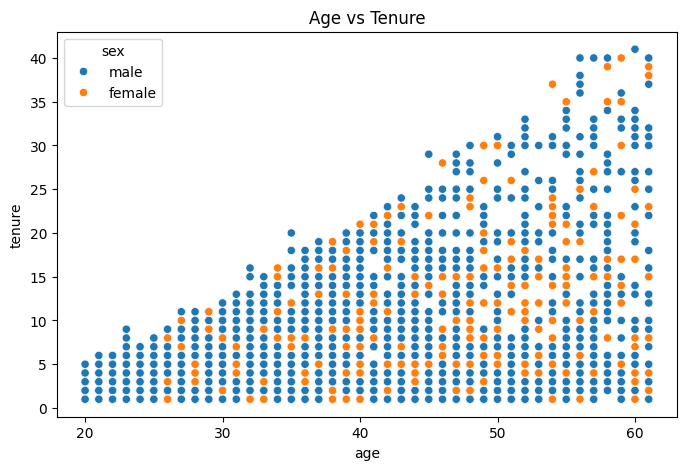

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='tenure', hue='sex', data=df)
plt.title('Age vs Tenure')
plt.show()

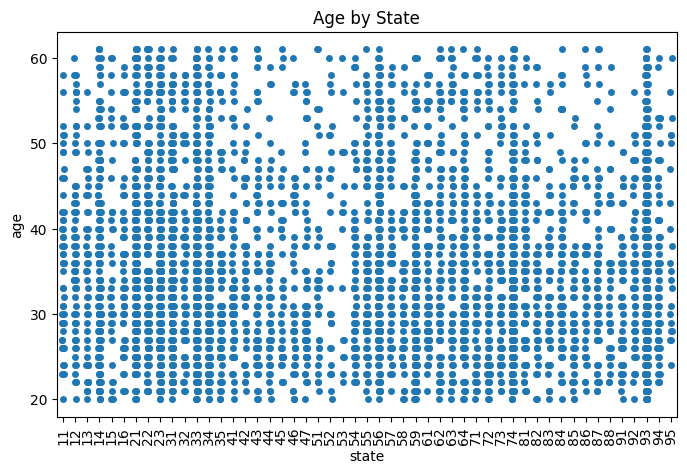

In [25]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='state', y='age', data=df, jitter=True)
plt.title('Age by State')
plt.xticks(rotation=90)
plt.show()

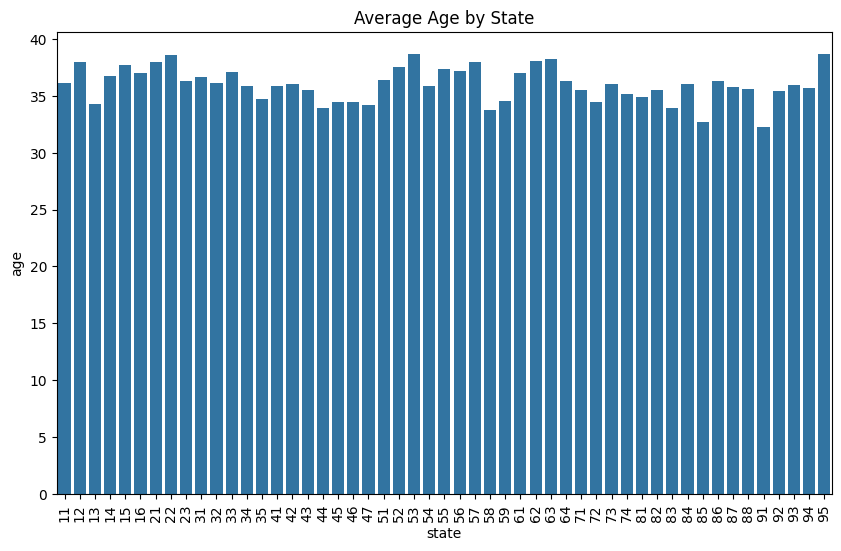

In [26]:
avg_age = df.groupby('state')['age'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='age', data=avg_age)
plt.title('Average Age by State')
plt.xticks(rotation=90)
plt.show()

## Module 5

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


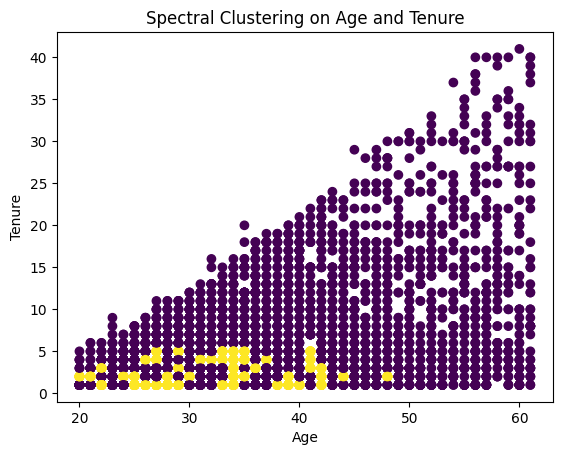

In [27]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

X = df[['age', 'tenure']].values

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10)
labels = spectral.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering on Age and Tenure')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.show()

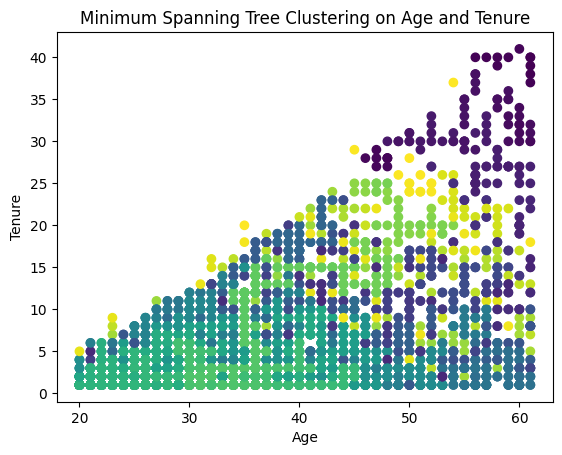

In [28]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

X = df[['age', 'tenure']].values

dist_matrix = pdist(X, metric='euclidean')
link = linkage(dist_matrix, method='single')
labels = fcluster(link, t=0.3, criterion='distance')

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Minimum Spanning Tree Clustering on Age and Tenure')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.show()

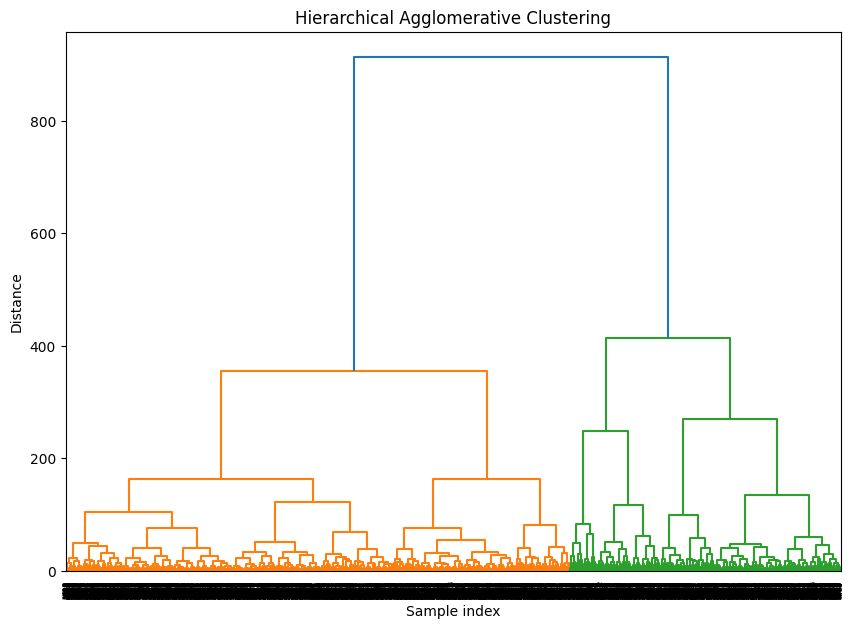

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['joblost_encoded'] = label_encoder.fit_transform(df['joblost'])
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# Select numerical features for clustering
numerical_features = ['stateur', 'age', 'tenure', 'joblost_encoded', 'sex_encoded']
X = df[numerical_features]

# Perform hierarchical clustering
link = linkage(X, method='ward')

# Generate dendrogram
plt.figure(figsize=(10, 7))
dendrogram(link)
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

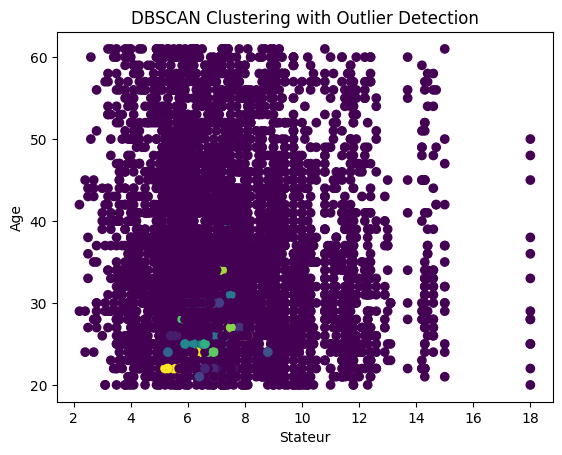

In [33]:
from sklearn.cluster import DBSCAN
label_encoder = LabelEncoder()
df['joblost_encoded'] = label_encoder.fit_transform(df['joblost'])
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

numerical_features = ['stateur', 'age', 'tenure', 'joblost_encoded', 'sex_encoded']
X = df[numerical_features]

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X['stateur'], X['age'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering with Outlier Detection')
plt.xlabel('Stateur')
plt.ylabel('Age')
plt.show()

## Module 6

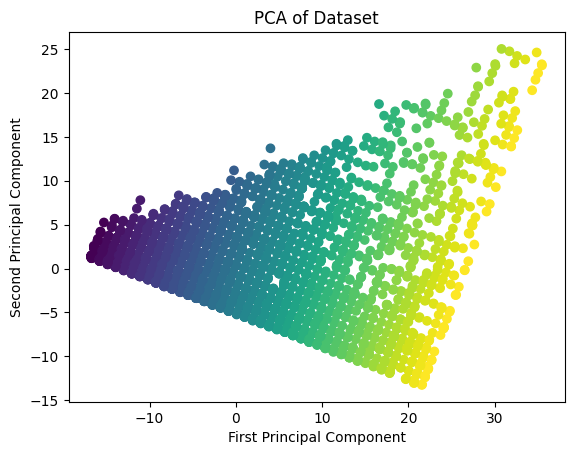

In [ ]:
from sklearn.decomposition import PCA

numerical_features = ['stateur', 'age', 'tenure', 'joblost_encoded', 'sex_encoded']
X = df[numerical_features]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['age'], cmap='viridis')
plt.title('PCA of Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns and standardizing them
data = df[['stateur', 'age', 'tenure', 'joblost_encoded', 'sex_encoded']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

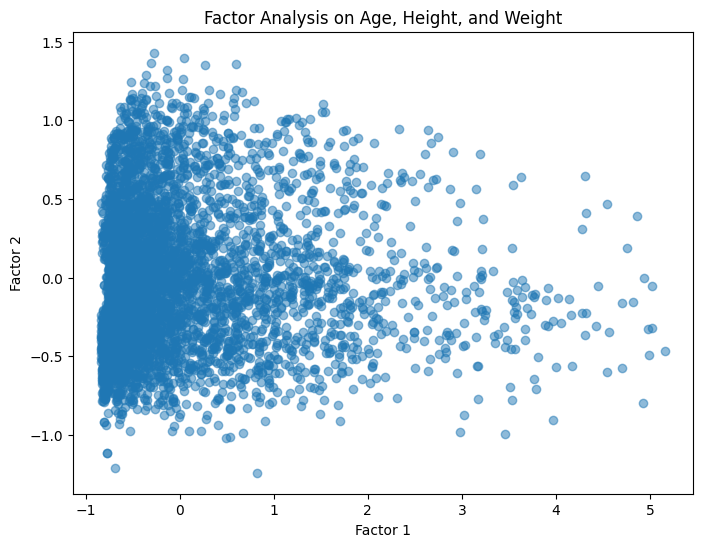

In [36]:
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=2)
factor_result = factor.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(factor_result[:, 0], factor_result[:, 1], alpha=0.5)
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("Factor Analysis on Age, Height, and Weight")
plt.show()

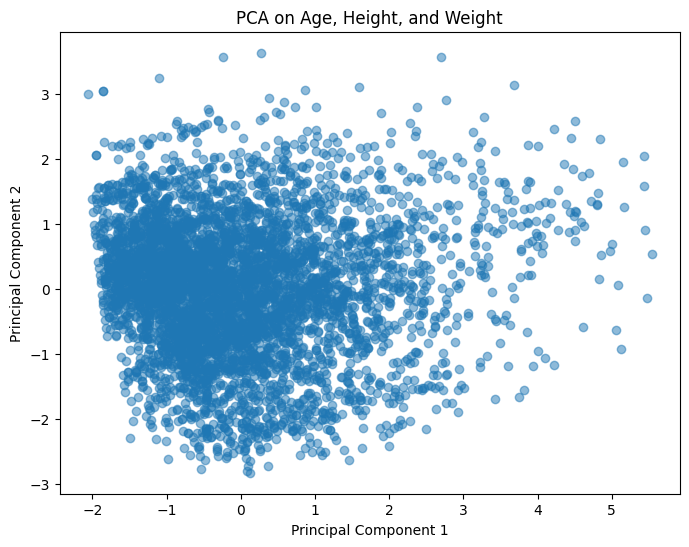

Explained Variance Ratio: [0.31722509 0.2145305 ]


In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Age, Height, and Weight")
plt.show()
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [38]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=0d10ae83ec880acf0e36d9ec5ef713832c3d5f2195cc7cdd36538be61f99fb0c
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


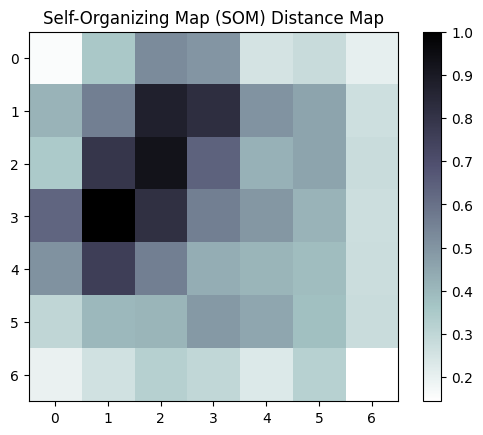

In [39]:
from minisom import MiniSom
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data

som = MiniSom(7, 7, X.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X, 100)

plt.imshow(som.distance_map().T, cmap='bone_r')
plt.title('Self-Organizing Map (SOM) Distance Map')
plt.colorbar()
plt.show()

## Module 7

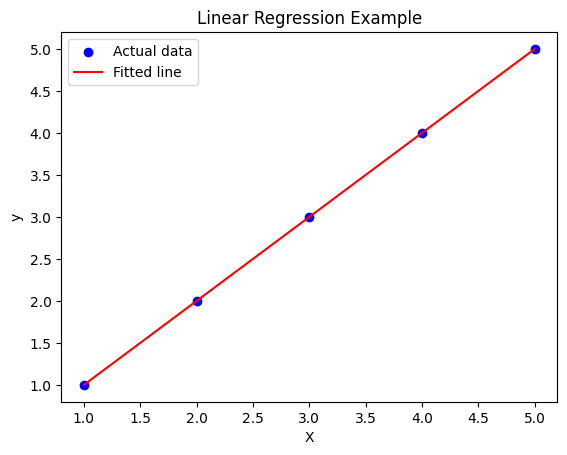

Slope: [1.]
Intercept: 0.0


In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 3, 4, 5])

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.title('Linear Regression Example')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

In [41]:
# Reinforcement Learning
import numpy as np
import random

grid = np.array([
    [0, 0, 0, -1, 0],
    [0, -1, 0, -1, 0],
    [0, -1, 0, 0, 0],
    [0, 0, 0, -1, 1]
])

q_table = np.zeros((4, 5, 4))

actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2
episodes = 1000

def valid_move(x, y):
    if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1] and grid[x, y] != -1:
        return True
    return False

for _ in range(episodes):
    x, y = 0, 0
    while (x, y) != (3, 4):
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(4))
        else:
            action = np.argmax(q_table[x, y])

        dx, dy = actions[action]
        new_x, new_y = x + dx, y + dy

        if valid_move(new_x, new_y):
            reward = 1 if (new_x, new_y) == (3, 4) else 0
            q_table[x, y, action] = q_table[x, y, action] + learning_rate * (reward + discount_factor * np.max(q_table[new_x, new_y]) - q_table[x, y, action])
            x, y = new_x, new_y

print("Q-table after training:")
print(q_table)

x, y = 0, 0
path = [(x, y)]
while (x, y) != (3, 4):
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    x, y = x + dx, y + dy
    path.append((x, y))

print("Path to goal:", path)

Q-table after training:
[[[0.         0.34295637 0.         0.43046721]
  [0.38658037 0.00685591 0.         0.        ]
  [0.08279381 0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.11224887]]

 [[0.         0.         0.38619349 0.4782969 ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.72720599]
  [0.         0.         0.         0.        ]
  [0.         0.         0.00317957 0.89917925]]

 [[0.         0.         0.42974231 0.531441  ]
  [0.         0.         0.         0.        ]
  [0.         0.81       0.64457572 0.65500118]
  [0.72754158 0.9        0.         0.        ]
  [0.80753388 0.         0.80382241 1.        ]]

 [[0.         0.59049    0.47763162 0.        ]
  [0.53048131 0.6561     0.         0.        ]
  [0.58800068 0.         0.729      0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]]
Path to 